In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## creating a random dataset with 1000 rows

X = np.linspace(0,100,100)
y = sorted(np.random.random_sample(100))

df = pd.DataFrame(zip(X,y), columns=['X','y'])

df.head()

,X,y
0,0.000000,0.018137
1,1.010101,0.030687
2,2.020202,0.036196
3,3.030303,0.043422
4,4.040404,0.051880


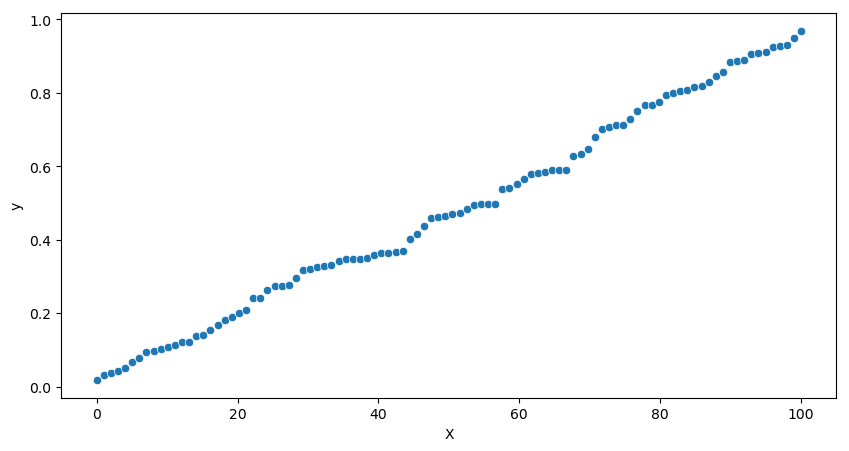

In [3]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(x=df['X'], y=df['y'], ax=ax)

ax.set_xlabel('X')
ax.set_ylabel('y')

plt.show()

In [4]:
## defining a loss function

def mean_squared_error(m, c, data):
    
    total_error = 0 ##initialization
    
    for i in range(len(data)):
        
        X = data.iloc[i]['X'] ## true X
        y = data.iloc[i]['y'] ## true y
        
        y_pred = m*X + c ## predicted y
        
        squared_error = (y - y_pred)**2
        
        total_error += squared_error
        
    mean_error = total_error/float(data.shape[0])
    
    return mean_error

In [5]:
## defining a gradient descent function

def gradient_descent(m, c, data, L):
    
    m_gradient = 0 ## initialization
    c_gradient = 0 ## initialization
    
    n = len(data)
    
    for i in range(len(data)):
        
        X = data.iloc[i]['X'] ## true X
        y = data.iloc[i]['y'] ## true y
        
        y_pred = m*X + c ## predicted y
        
        m_gradient += (-2/n) * X * (y - y_pred)
        c_gradient += (-2/n) * (y - y_pred)
        
    ## update
    m = m - (L * m_gradient)
    c = c - (L * c_gradient)
        
    return m, c

In [28]:
m = 0
c = 0
mse = 0
L = 0.0001
epochs = 20

## lists to plot m, c, and error over time
m_list = list()
c_list = list()
mse_list = list()

for i in range(epochs):
    
    m, c = gradient_descent(m, c, df, L)
    mse = mean_squared_error(m, c, df)
    
    m_list.append(m)
    c_list.append(c)
    mse_list.append(mse)

Slope: 0.009546813433803827


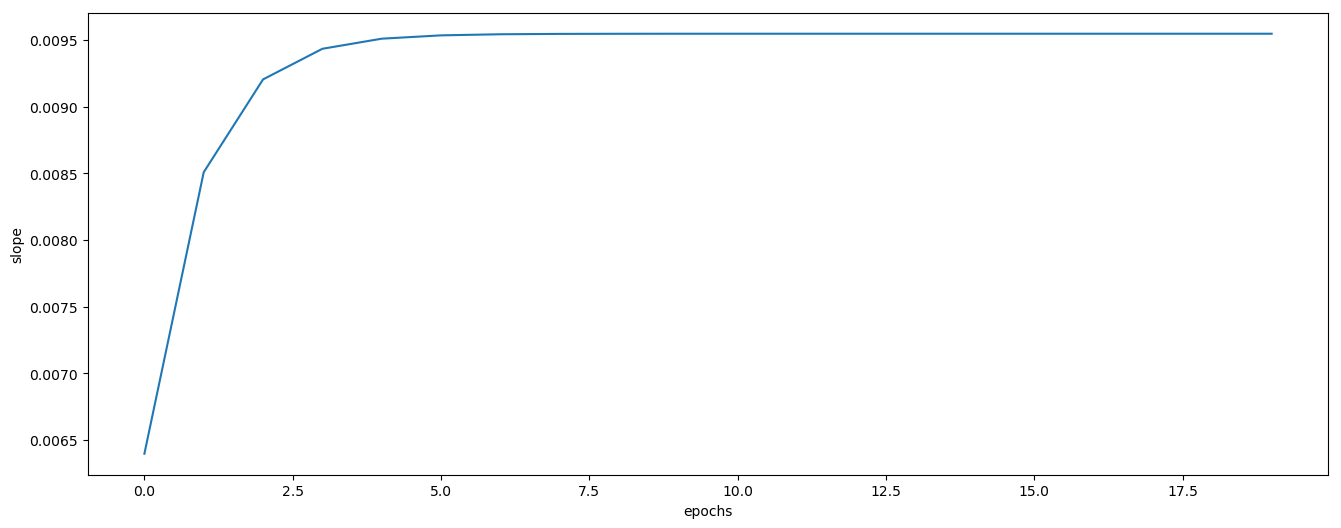

In [29]:
## plotting values of m over 1000 epochs

fig, ax = plt.subplots(figsize=(16,6))

ax.plot(m_list)
ax.set_xlabel('epochs')
ax.set_ylabel('slope')

print(f"Slope: {m}")

Slope: 0.00014998742192261485


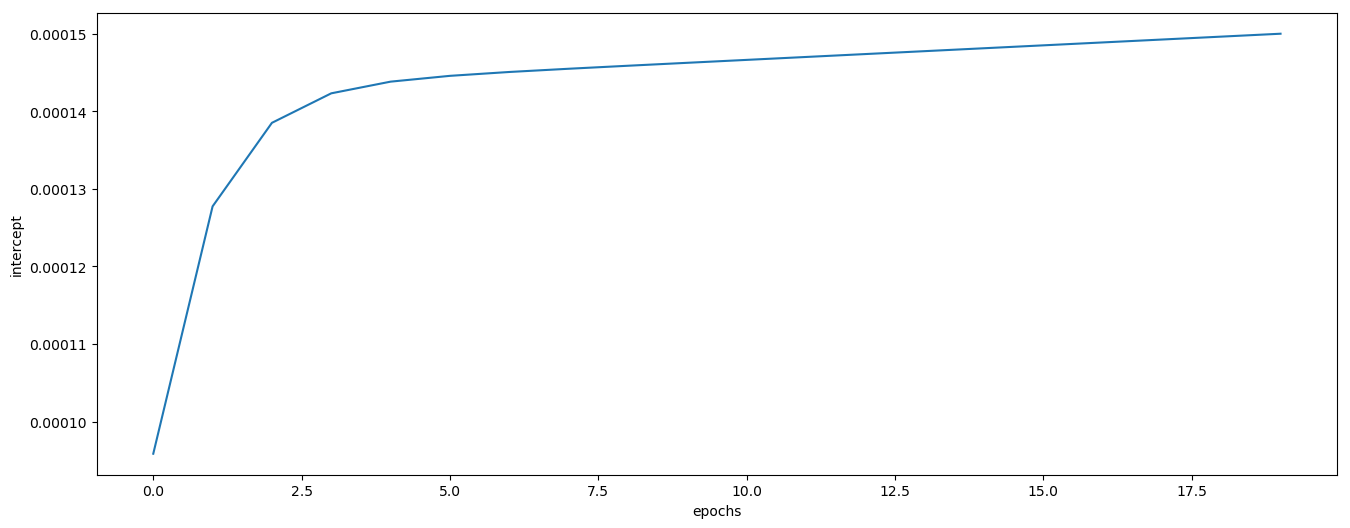

In [30]:
## plotting values of c over 1000 epochs

fig, ax = plt.subplots(figsize=(16,6))

ax.plot(c_list)
ax.set_xlabel('epochs')
ax.set_ylabel('intercept')

print(f"Slope: {c}")

Slope: 0.0003628168684995487


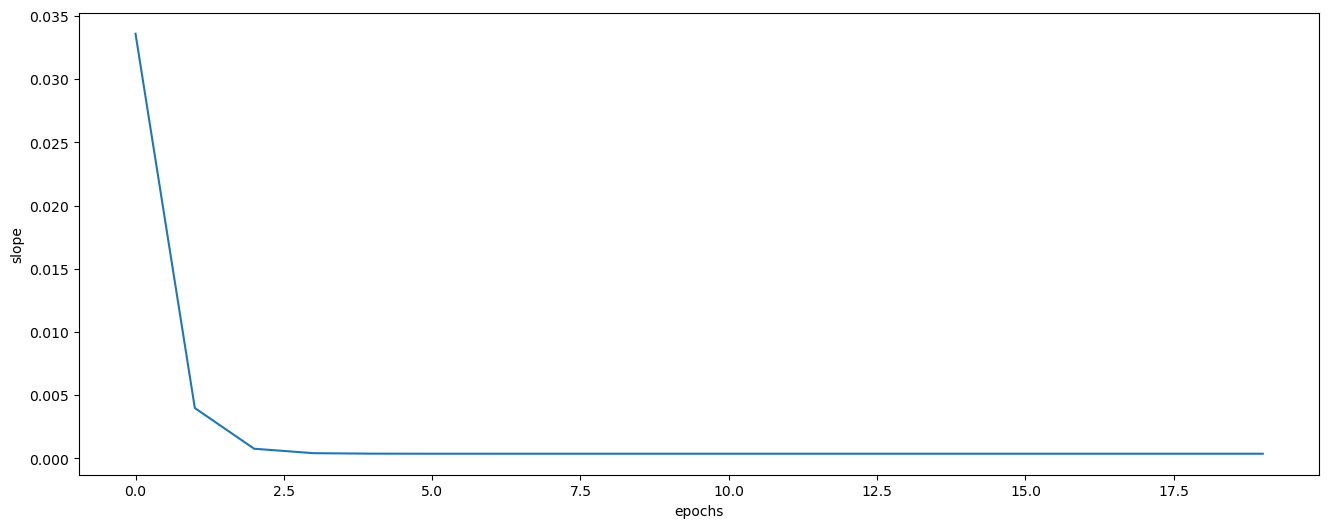

In [31]:
## plotting values of mse over 1000 epochs

fig, ax = plt.subplots(figsize=(16,6))

ax.plot(mse_list)
ax.set_xlabel('epochs')
ax.set_ylabel('slope')

print(f"Slope: {mse}")

In [32]:
## creating prediction column
df['y_pred'] = df['X'].apply(lambda X: m*X + c)

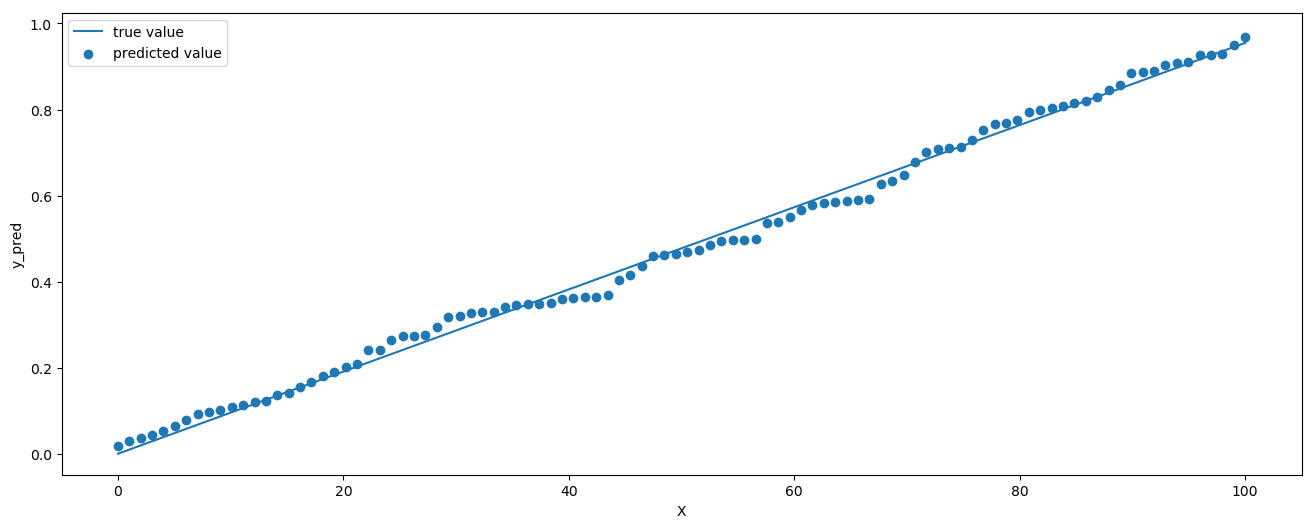

In [33]:
fig, ax = plt.subplots(figsize=(16,6))

##sns.scatterplot(x=df['X'], y=df['y'], ax=ax)
ax.scatter(x=df['X'], y=df['y'])
sns.lineplot(x=df['X'], y=df['y_pred'], ax=ax)
ax.legend(['true value', 'predicted value'])

plt.show()